In [47]:
import cv2
import os
import shutil
import numpy as np])])])])])
import matplotlib.pyplot as plt
from PIL import Image
import thinning
import pytesseract as pyt
import imutils

In [48]:
def showImage(title, image):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

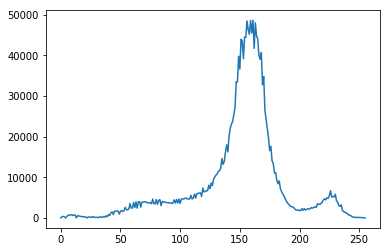

(1080, 1920)
161


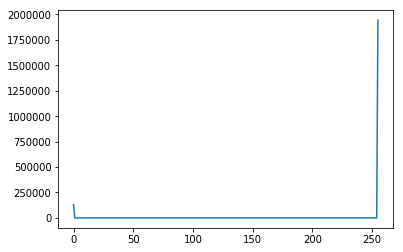

In [109]:
image = cv2.imread('IP/pancard_image.jpg')

# Create our shapening kernel, it must equal to one eventually
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
# image = cv2.filter2D(image, -1, kernel_sharpening)

# showImage('test', image)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

showImage('test', lab)

l, a, b = cv2.split(lab)
lm = l.copy()
la = l.copy()
aa = a.copy()
bb = b.copy()

hist,bins = np.histogram(l,256,[0,256])
hista,bins = np.histogram(a,256,[0,256])
histb,bins = np.histogram(b,256,[0,256])
plt.plot(hist)
# plt.plot(hista), plt.plot(histb)
plt.show()

# lm -= 100
# lm[lm < 0] = 0
print(lm.shape)
print(np.argmax(hist))
mean = int((np.argmax(hist) + np.argmin(hist)) / 2)

lm[lm > mean] = 255
lm[lm <= mean] = 0

# aa[aa > 150] = 255
# aa[aa <= 150] = 0

# bb[bb > 95] = 255
# bb[bb <= 95] = 0

# la += 40
# la[la > 255] = 255

# lab = cv2.merge(l, a, b)
# laba = np.concatenate((la, a, b))
# # laba = np.invert(laba)
# # print(np.max(l))
# showImage('test', laba)

hist,bins = np.histogram(lm,256,[0,256])
plt.plot(hist)
plt.show()
labm = np.concatenate((lm, aa, bb))

kernel = np.ones((2, 2), np.uint8)

lm = cv2.morphologyEx(lm, cv2.MORPH_OPEN, kernel)
lm = cv2.erode(lm, kernel, iterations = 2)
lm = cv2.dilate(lm, kernel, iterations = 3)

showImage('test', lm)

In [5]:
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import thinning
import pytesseract as pyt
import imutils

In [191]:
def getText(template, image):
    
    template = cv2.imread(template, 0)
#     showImage('og', template)
#     testing = image
    
    image = cv2.imread(image, 0)
    ret3, template = cv2.threshold(template, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    global og_image
    og_image = image
#     testing = cv2.imread(testing)
#     testing = increase_brightness(testing)
#     showImage('testing', testing)
#     testing = cv2.cvtColor(testing, cv2.COLOR_BGR2GRAY)
#     kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#     testing = cv2.filter2D(testing, -1, kernel)
#     kernel = np.ones((3, 3), np.uint8)
#     testing = cv2.dilate(testing, kernel, iterations = 1)
#     ret3, testing = cv2.threshold(testing, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     thresh = np.invert(testing)
#     testing1 = cv2.Canny(testing, 30, 150)
#     kernel = np.ones((3, 3), np.uint8)
#     testing = cv2.dilate(testing1, kernel, iterations = 1)
#     testing = np.subtract(thresh, testing)
#     showImage('testing', testing)
#     cv2.imwrite('bright.jpg', testing)
    
    # Sharpening the image
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    unsharp_image = cv2.filter2D(image, -1, kernel)
    
#     cv2.imshow('og', unsharp_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Adaptive Thresholding
    # OBinary = cv2.adaptiveThreshold(unsharp_image,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,5)

    # Thresholding
    ret3, OBinary = cv2.threshold(unsharp_image, 220, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)

    showImage('testing', OBinary)
#     OBinary = cv2.medianBlur(OBinary, 5)
#     OBinary = cv2.bilateralFilter(OBinary,12,25,25)
#     cv2.imwrite('nonbilateral.jpg', OBinary)
    kernel = np.ones((2, 2), np.uint8)
#     
#     OBinary = cv2.morphologyEx(OBinary, cv2.MORPH_OPEN, kernel)
    OBinary = cv2.erode(OBinary, kernel, iterations = 3)
#     OBinary = cv2.medianBlur(OBinary, 3)
    showImage('testing', OBinary)
#     showImage("subtracted", OBinary)
    
    # Eroding
#     kernel = np.ones((3, 3), np.uint8)
#     OBinary = cv2.erode(OBinary, kernel, iterations = 1)
    
    subtract = np.subtract(OBinary, template)
    showImage('testing', subtract)
    text = pyt.image_to_string(subtract)
    text = text.replace('/', 'i').replace("#", "4").replace("'", "").replace('"', '').replace('!', 'I').replace(']', 'I').upper()
#     if text == '':
#         continue
#     print(text)
    
    testing = imutils.skeletonize(subtract, size=(3, 3))
#     showImage('testing', testing)
    
    get_lines(subtract)
    
#     showImage("subtracted", subtract)

    cv2.destroyAllWindows()
    
    
def showImage(title, image):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

def get_lines(image):
    
    # getting edges of the text in image
    image_edges = cv2.Canny(image, 30, 150)
    
    # dilating image to detect individual lines
    kernel_line = np.ones((2, 100), np.uint8)
    dilated_line = cv2.dilate(image_edges, kernel_line, iterations=1)
    
    showImage('lines', dilated_line)
    
    # finding contours of the line
    im2, ctrs_line, hier = cv2.findContours(dilated_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_line = sorted(ctrs_line, key=lambda ctr: cv2.boundingRect(ctr)[1])
    
    for i, ctr_line in enumerate(sorted_ctrs_line):
        # getting coordinates of the line contour
        x_line, y_line, w_line, h_line = cv2.boundingRect(ctr_line)
        if w_line * h_line < 3000 or w_line * h_line > 50000:
            continue
            
        cropped_line = image[y_line:y_line + h_line, x_line:x_line + w_line]
        blac = np.invert(cropped_line)
        cv2.imwrite('bdgdfg' + str(i) + '.jpg', blac)
        
        testing = og_image[y_line:y_line + h_line, x_line:x_line + w_line]
        
        ret3, testing = cv2.threshold(testing, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        testing = np.invert(testing)
        testing = imutils.skeletonize(testing, size=(3, 3))
        cv2.imwrite('casdsad' + str(i) + '.jpg', testing)
        kernel = np.ones((3, 3), np.uint8)
        testing = cv2.dilate(testing, kernel, iterations = 1)
        cv2.imwrite('asdsad' + str(i) + '.jpg', testing)
        
        text = pyt.image_to_string(cropped_line)
        text = text.replace('/', 'i').replace("#", "4").replace("'", "").replace('"', '').replace('!', 'I').replace(']', 'I').upper()
        if text == '':
            continue
        print(text)
        
def increase_brightness(img, value=60):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

#     lim = 255 - value
#     v[v > lim] = 255
#     v[v <= lim] += value
    v += 255
    v[v > 255] = 255
    print(np.max(v))

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [196]:
template = 'IP/license_template.jpg'
image = 'IP/licence_image5.png'

getText(template, image)

CL MG MH01 20150001078
10—12—2014
V F «(F

09-12—2034 (NT)
10422014
MCWG 10—12-2014
‘JLJE 04-10—1996
NLAY’TIC PRANEET BCMMA
AN
3’ I‘

MI‘

‘1
L”

SHRIHARI

BOMMA
DD 307 SUKH SAGAR NEW PRABHADEVI ROAD
PRABHADEVI MU MBAI
[DIN 400025


In [119]:
test = cv2.imread('pancard.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

cv2.imshow('test', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
image = cv2.imread('IP/pancard.jpg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
lower_red = np.array([110,50,50]) 
upper_red = np.array([130,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red) 
  
# The bitwise and of the frame and mask is done so  
# that only the blue coloured objects are highlighted  
# and stored in res 
res = cv2.bitwise_and(image,image, mask= mask) 
cv2.imshow('frame',image) 
cv2.imshow('mask',mask) 
cv2.imshow('res',res) 
  
# This displays the frame, mask  
# and res which we created in 3 separate windows. 
k = cv2.waitKey(0
                
# Destroys all of the HighGUI windows. 
cv2.destroyAllWindows() 

SyntaxError: 'break' outside loop (<ipython-input-5-eae237d2ec83>, line 21)

In [33]:
# pre_processed = pre_processing('hhbh.jpg')
pre_processed = cv2.imread('check.jpg', 0)
text = pyt.image_to_string(pre_processed)
print(text.replace('/', 'i').replace("'", "").replace('"', ''))

CSUPRGGMH

 

‘w ,
Wi Name
VIPUL SINGH RAGHUVANSHI


In [30]:
def pre_processing(path):
    
    # Read Image
    img = cv2.imread(path, 0)
    grayscaled = img
    # Grayscale step
#     grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     cv2.imshow('test', grayscaled)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    # Noise Clearing step
    noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
#     gaussian_3 = cv2.GaussianBlur(grayscaled, (9,9), 10.0)
#     unsharp_image = cv2.addWeighted(grayscaled, 1.5, gaussian_3, -0.5, 0, grayscaled)
#     cv2.imshow('test', unsharp_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    # Adaptive Thresholding
#     OBinary = cv2.adaptiveThreshold(unsharp_image,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,5)
    
    # Thresholding
    ret3, OBinary = cv2.threshold(noise_cleared, 250, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
#     OBinary = imutils.skeletonize(OBinary, size=(3, 3))
    OBinary = cv2.medianBlur(OBinary, 5)
    
#     cv2.imshow('blur', OBinary)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    global og_image
    og_image = OBinary
    
    # Eroding
    kernel = np.ones((2, 2), np.uint8)
    OBinary = cv2.erode(OBinary, kernel, iterations = 1)
    
    cv2.imshow('erode', OBinary)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    cv2.imwrite('asds.jpg', OBinary)
    
    return OBinary

In [31]:
pre_processed = pre_processing('licence.jpg')
text = pyt.image_to_string(pre_processed)
print(text.replace('/', 'i').replace("'", "").replace('"', ''))

~ OL No MH01 20150001078 00i 10-12-2014 ‘-
Valid TIil 09-12-2034 (NT)

AUYHORISA TION TO DRIVE FOLLOVﬁNO CLASS
OF VEMCLES THROUGHOUTiMOM

COV DOI
LMV 10-12-2014
MCWG 10-12-2014

FORM]
RULE 1‘ (2)

 

DOB 04-10-1996 86

Name PRANEET BOMMA
SiDiWOISHRIHARI BOMMA

Add 307 SUKH SAGAR NEW PRABHADEVI ROAD x.
PRABHADEVI MUMBAI
l _

PIN 00002:; W, T I.
naw &iL)or ’ signatureiThumb

7S umg uihonty MH012015211 ImpressmolHobar


In [13]:
import cv2
import os
import shutil
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
import thinning
import pytesseract as pyt
import imutils

# Preprocessing

In [30]:
def pre_processing(path):
    
    # Read Image
    img = cv2.imread(path, 0)
    grayscaled = img
    # Grayscale step
#     grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('test', grayscaled)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Noise Clearing step
#     noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
    gaussian_3 = cv2.GaussianBlur(grayscaled, (9,9), 10.0)
    unsharp_image = cv2.addWeighted(grayscaled, 1.5, gaussian_3, -0.5, 0, grayscaled)
    cv2.imshow('test', unsharp_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Adaptive Thresholding
#     OBinary = cv2.adaptiveThreshold(unsharp_image,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,5)
    
    # Thresholding
    ret3, OBinary = cv2.threshold(grayscaled, 250, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
#     OBinary = imutils.skeletonize(OBinary, size=(3, 3))
    OBinary = cv2.medianBlur(OBinary, 5)
    
    cv2.imshow('blur', OBinary)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    global og_image
    og_image = OBinary
    
    # Eroding
    kernel = np.ones((3, 3), np.uint8)
    OBinary = cv2.erode(OBinary, kernel, iterations = 1)
    
    cv2.imshow('erode', OBinary)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    cv2.imwrite('asds.jpg', OBinary)
    
    return OBinary

# Convert image into matrix of image rows and image columns

In [3]:
'''
this function convert image into matrix of image rows
'''


def imgToMatrixR(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all rows
    for i in range(0, height):
        row = []
        for j in range(0, width):
            row.append(img[i, j])
        matrix.append(row)
    return matrix


'''
this function convert image into matrix of image columns
'''


def imgToMatrixC(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all columns
    for i in range(0, width):
        col = []
        for j in range(0, height):
            col.append(img[j, i])
        matrix.append(col)
    return matrix


'''
this function count a specific value (parameter p) in matrix
'''


def countPixel(matrix, p):
    counter = []
    for k in range(0, len(matrix)):
        counter.append(matrix[k].count(p))
    return counter

# Line Segmentation

In [8]:
def get_lines(image):
    
    # getting edges of the text in image
    image_edges = cv2.Canny(image, 30, 150)
    
    # dilating image to detect individual lines
    kernel_line = np.ones((3, 25), np.uint8)
    dilated_line = cv2.dilate(image_edges, kernel_line, iterations=1)
    
    # finding contours of the line
    im2, ctrs_line, hier = cv2.findContours(dilated_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_line = sorted(ctrs_line, key=lambda ctr: cv2.boundingRect(ctr)[1])
    
    for i, ctr_line in enumerate(sorted_ctrs_line):
        # getting coordinates of the line contour
        x_line, y_line, w_line, h_line = cv2.boundingRect(ctr_line)
        if w_line * h_line < 3000 or w_line * h_line > 50000:
            continue
            
        cropped_line = pre_processed[y_line:y_line + h_line, x_line:x_line + w_line]
        cv2.imshow('test', cropped_line)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        text = pyt.image_to_string(cropped_line)
        print(text)
            
#         get_words(x_line, y_line, w_line, h_line)

# Word Segmentation

In [5]:
def get_words(x, y, w, h):

    cropped_line = pre_processed[y:y + h, x:x + w]
    # getting edges of the text in image
    
    # Edge Detection
    image_edges = cv2.Canny(cropped_line, 30, 150)
    
    kernel_word = np.ones((3, 12), np.uint8)
    dilated_word = cv2.dilate(image_edges, kernel_word, iterations=1)
    
    # Getting contours from the line
    im2, ctrs_word, hier = cv2.findContours(dilated_word.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_word = sorted(ctrs_word, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    for i, ctr_word in enumerate(sorted_ctrs_word):
        # getting coordinates of the word contour
        x_word, y_word, w_word, h_word = cv2.boundingRect(ctr_word)
        
        adjusted_x = x + x_word
        adjusted_y = y + y_word
        
        cropped_word = pre_processed[adjusted_y:adjusted_y + h_word, adjusted_x:adjusted_x + w_word]
        
#         get_characters(adjusted_x, adjusted_y, w_word, h_word)

# Character Segmentation

In [6]:
def get_characters(x, y, w, h):

    cropped_word = pre_processed[y:y + h, x:x + w]
    
    kernel_word = np.ones((5, 3), np.uint8)
    cropped_word = cv2.dilate(cropped_word, kernel_word, iterations=1)
    
#     cv2.imshow('test', cropped_word)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    # get image dimension
    height, width = cropped_word.shape
    
    # convert image to matrix of columns
    matrix = imgToMatrixC(cropped_word)
    
    # count white pixels in each column
    white_counter = countPixel(matrix, 255)
    
    # determine potential segmentation columns (psc).
    # psc is any column contains no or one white bixel at most , last column in image is also a psc .
    psc = [0]
    for p in range(0, len(white_counter)):
        if white_counter[p] <= 2 or p >= len(white_counter) - 1:
            psc.append(p)
            
    # determine segmentation columns (sc)
    # sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
    sc = []
    summ = 0
    count = 0
    for n in range(0, len(psc) - 1):
        summ = summ + psc[n]
        count = count + 1
        # combine each set of sequence black columns into only one sc ,last column is also a sc
        if psc[n] + 3 < psc[n + 1] or n >= len(psc) - 2:
            sc.append(int(summ / count))
            summ = 0
            count = 0
            
    # segment image into chars
    for c in range(0, len(sc) - 1):
        crop_img = og_image[y:y + height, x + sc[c]:x + sc[c + 1] + 2]
        if crop_img.shape[0] < 20 or crop_img.shape[0] * crop_img.shape[1] < 300:
            continue
        global j
        j += 1
        directory= "output/characters"
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory+"/"+str(j)+".png", crop_img)

In [8]:
pre_processed = pre_processing('licence.jpg')
image = pre_processed.copy()
j = 0
get_lines(image)
# get_words(lines[80], img)
# for i in lines:
#     print(i[2] * i[3])
#     get_words(i, img)

NameError: name 'get_lines' is not defined

# Working on thinned image

In [2]:
import cv2
import os
import shutil
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
import thinning

# Preprocessing

In [37]:
def pre_processing(path):
    
    # Read Image
    img = cv2.imread(path)
    
    # Grayscale step
    grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Noise Clearing step
    noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
    
    # Adaptive Thresholding
    OBinary = cv2.adaptiveThreshold(noise_cleared,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,15,5)
    
    kernel = np.ones((3, 3), np.uint8)
    OBinary = cv2.erode(OBinary, kernel, iterations = 1)
    
    thinned = thinning.guo_hall_thinning(OBinary)
    cv2.imshow('test', thinned)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Thresholding
    ret3, OBinary = cv2.threshold(noise_cleared, 250, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    thinned = thinning.guo_hall_thinning(OBinary)
    cv2.imshow('test', thinned)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
    global og_image
    og_image = OBinary
    
    # Eroding
    kernel = np.ones((3, 3), np.uint8)
    OBinary = cv2.erode(OBinary, kernel, iterations = 1)
    
    return OBinary

# Convert image into matrix of image rows and image columns

In [3]:
'''
this function convert image into matrix of image rows
'''


def imgToMatrixR(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all rows
    for i in range(0, height):
        row = []
        for j in range(0, width):
            row.append(img[i, j])
        matrix.append(row)
    return matrix


'''
this function convert image into matrix of image columns
'''


def imgToMatrixC(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all columns
    for i in range(0, width):
        col = []
        for j in range(0, height):
            col.append(img[j, i])
        matrix.append(col)
    return matrix


'''
this function count a specific value (parameter p) in matrix
'''


def countPixel(matrix, p):
    counter = []
    for k in range(0, len(matrix)):
        counter.append(matrix[k].count(p))
    return counter

# Line Segmentation

In [4]:
def get_lines(image):
    
    # getting edges of the text in image
    image_edges = cv2.Canny(image, 30, 150)
    
    # dilating image to detect individual lines
    kernel_line = np.ones((3, 25), np.uint8)
    dilated_line = cv2.dilate(image_edges, kernel_line, iterations=1)
    
    # finding contours of the line
    im2, ctrs_line, hier = cv2.findContours(dilated_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_line = sorted(ctrs_line, key=lambda ctr: cv2.boundingRect(ctr)[1])
    
    for i, ctr_line in enumerate(sorted_ctrs_line):
        # getting coordinates of the line contour
        x_line, y_line, w_line, h_line = cv2.boundingRect(ctr_line)
        if w_line * h_line < 3000 or w_line * h_line > 50000:
            continue
            
#         get_words(x_line, y_line, w_line, h_line)

# Word Segmentation

In [5]:
def get_words(x, y, w, h):

    cropped_line = pre_processed[y:y + h, x:x + w]
    # getting edges of the text in image
    
    # Edge Detection
    image_edges = cv2.Canny(cropped_line, 30, 150)
    
    kernel_word = np.ones((3, 12), np.uint8)
    dilated_word = cv2.dilate(image_edges, kernel_word, iterations=1)
    
    # Getting contours from the line
    im2, ctrs_word, hier = cv2.findContours(dilated_word.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_word = sorted(ctrs_word, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    for i, ctr_word in enumerate(sorted_ctrs_word):
        # getting coordinates of the word contour
        x_word, y_word, w_word, h_word = cv2.boundingRect(ctr_word)
        
        adjusted_x = x + x_word
        adjusted_y = y + y_word
        
        cropped_word = pre_processed[adjusted_y:adjusted_y + h_word, adjusted_x:adjusted_x + w_word]
        
        get_characters(adjusted_x, adjusted_y, w_word, h_word)

# Character Segmentation

In [6]:
def get_characters(x, y, w, h):

    cropped_word = pre_processed[y:y + h, x:x + w]
    
    kernel_word = np.ones((5, 3), np.uint8)
    cropped_word = cv2.dilate(cropped_word, kernel_word, iterations=1)
    
#     cv2.imshow('test', cropped_word)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    # get image dimension
    height, width = cropped_word.shape
    
    # convert image to matrix of columns
    matrix = imgToMatrixC(cropped_word)
    
    # count white pixels in each column
    white_counter = countPixel(matrix, 255)
    
    # determine potential segmentation columns (psc).
    # psc is any column contains no or one white bixel at most , last column in image is also a psc .
    psc = [0]
    for p in range(0, len(white_counter)):
        if white_counter[p] <= 2 or p >= len(white_counter) - 1:
            psc.append(p)
            
    # determine segmentation columns (sc)
    # sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
    sc = []
    summ = 0
    count = 0
    for n in range(0, len(psc) - 1):
        summ = summ + psc[n]
        count = count + 1
        # combine each set of sequence black columns into only one sc ,last column is also a sc
        if psc[n] + 3 < psc[n + 1] or n >= len(psc) - 2:
            sc.append(int(summ / count))
            summ = 0
            count = 0
            
    # segment image into chars
    for c in range(0, len(sc) - 1):
        crop_img = og_image[y:y + height, x + sc[c]:x + sc[c + 1] + 2]
        if crop_img.shape[0] < 20 or crop_img.shape[0] * crop_img.shape[1] < 300:
            continue
        global j
        j += 1
        directory= "output/characters"
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory+"/"+str(j)+".png", crop_img)

In [38]:
pre_processed = pre_processing('licence.jpg')
image = pre_processed.copy()
j = 0
# get_lines(image)
# get_words(lines[80], img)
# for i in lines:
#     print(i[2] * i[3])
#     get_words(i, img)

In [6]:
import pytesseract as pyt
import cv2
import os
import shutil
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
import thinning

In [2]:
def pre_processing(path):
    # Read Image
    img = cv2.imread(path)

    # scaling
    height, width = img.shape[:2]
    #     scaled = img
    #     if height < 1600 and width < 1200:
    #         scaled = cv2.resize(img, (2 * width, 2* height), interpolation=cv2.INTER_LINEAR)
    #         # cv2.imwrite('(0)scaled.jpg', scaled)

    # Deskew step
    #     deskewed = deskew(scaled)
    # cv2.imwrite("(1)deskewed.jpg", deskewed)

    # Grayscale step
    grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imwrite("(2)grayscale.jpg", grayscaled)

    # Noise Clearing step
    noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
    cv2.imwrite("(3)denoise.jpg", noise_cleared)
    
#     x = np.random.randn(10000)  # example data, random normal distribution
#     num_bins = 50
#     n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor="green", alpha=0.5)
#     plt.xlabel(r"Description of $x$ coordinate (units)")
#     plt.ylabel(r"Description of $y$ coordinate (units)")
#     plt.title(r"Histogram title here (remove for papers)")
#     plt.show();
    
    
    '''
    # GAUSSIAN's thresholding
    GBinary = cv2.adaptiveThreshold(noise_cleared,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,5)
    # cv2.imwrite("(4)binarization.jpg", GBinary)
    '''

    # Otsu's thresholding after Gaussian filtering
#     blur = cv2.GaussianBlur(noise_cleared, (5, 5), 0)
#     cv2.imwrite("(4)thresbinarization.jpg", blur)
    OBinary = cv2.adaptiveThreshold(noise_cleared,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,5)
    ret3, OBinary = cv2.threshold(OBinary, 250, 255,
                                  cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
    cv2.imwrite("(4)thresbinarization.jpg", OBinary)
    kernel = np.ones((3, 3), np.uint8)
#     print(type(kernel))
#     kernel = np.array([[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0],
#                        [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]], np.uint8)
#     print(type(kernel))
    print(kernel)
    OBinary = cv2.erode(OBinary, kernel, iterations = 1)

#     if os.path.exists("output"):
#         shutil.rmtree("output")
#     os.makedirs("output")
#     cv2.imwrite("output/Preprocessed.png", OBinary)

    return OBinary

# Convert image into matrix of image rows and image columns

In [3]:
'''
this function convert image into matrix of image rows
'''


def imgToMatrixR(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all rows
    for i in range(0, height):
        row = []
        for j in range(0, width):
            row.append(img[i, j])
        matrix.append(row)
    return matrix


'''
this function convert image into matrix of image columns
'''


def imgToMatrixC(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all columns
    for i in range(0, width):
        col = []
        for j in range(0, height):
            col.append(img[j, i])
        matrix.append(col)
    return matrix


'''
this function count a specific value (parameter p) in matrix
'''


def countPixel(matrix, p):
    counter = []
    for k in range(0, len(matrix)):
        counter.append(matrix[k].count(p))
    return counter

# Line Segmentation

In [4]:
def get_lines(image):
    # getting edges of the text in image
    image_edges = cv2.Canny(image, 30, 150)

    # dilating image /=to detect individual lines
    kernel_line = np.ones((3, 25), np.uint8)
    dilated_line = cv2.dilate(image_edges, kernel_line, iterations=1)

    # finding contours of the line
    im2, ctrs_line, hier = cv2.findContours(
        dilated_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_line = sorted(
        ctrs_line, key=lambda ctr: cv2.boundingRect(ctr)[1])
    #     image = cv2.drawContours(image, sorted_ctrs_line, -1, (255,255,0), 5)

    for i, ctr_line in enumerate(sorted_ctrs_line):
        # getting coordinates of the line contour
        x_line, y_line, w_line, h_line = cv2.boundingRect(ctr_line)
        if w_line * h_line < 3000 or w_line * h_line > 50000:
            continue


#         lines.append(xywh)
        get_words(x_line, y_line, w_line, h_line)

# Word Segmentation

In [13]:
def get_words(x, y, w, h):

    cropped_line = pre_processed[y:y + h, x:x + w]
    # getting edges of the text in image
    global j
    j += 1
    directory= "output/lines_og"
    if not os.path.exists(directory):
        os.makedirs(directory)
#     cropped_word = pre_processed[adjusted_y:adjusted_y + h_word, adjusted_x:adjusted_x + w_word]
    cv2.imwrite(directory+"/"+str(j)+".png", cropped_line)
    
    dilated_word = cv2.Canny(cropped_line, 30, 150)

    # dilating image /=to detect individual words
    kernel_word = np.ones((3, 10), np.uint8)
#     dilated_word = cv2.dilate(image_edges, kernel_word, iterations=1)

    # finding contours of the word
    im2, ctrs_word, hier = cv2.findContours(
        dilated_word.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs_word = sorted(
        ctrs_word, key=lambda ctr: cv2.boundingRect(ctr)[1])

    for i, ctr_word in enumerate(sorted_ctrs_word):
        # getting coordinates of the word contour
        x_word, y_word, w_word, h_word = cv2.boundingRect(ctr_word)
        adjusted_x = x + x_word
        adjusted_y = y + y_word
        directory= "output/words_og"
        if not os.path.exists(directory):
            os.makedirs(directory)
        cropped_word = pre_processed[adjusted_y:adjusted_y + h_word, adjusted_x:adjusted_x + w_word]
        cv2.imwrite(directory+"/"+str(i)+".png", cropped_word)
#         get_characters(adjusted_x, adjusted_y, w_word, h_word)

# Character Segmentation

In [65]:
def get_characters(x, y, w, h):

    cropped_word = pre_processed[y:y + h, x:x + w]
    #     print(cropped_word.shape)
    global i
    i += 1
    directory= "output/words_og"
    if not os.path.exists(directory):
        os.makedirs(directory)
    cv2.imwrite(directory+"/"+str(i)+".png", cropped_word)
    
    kernel = np.ones((1, 1), np.uint8)
#     print(kernel)
    thinned = cv2.erode(cropped_word, kernel, iterations = 1)
#     cropped_word = cv2.Canny(cropped_word, 30, 150)
    
    directory= "output/words_eroded"
    if not os.path.exists(directory):
        os.makedirs(directory)
    cv2.imwrite(directory+"/"+str(i)+".png", thinned)
    
    cropped_word = thinning.guo_hall_thinning(thinned)
    
    directory= "output/words_thinned"
    if not os.path.exists(directory):
        os.makedirs(directory)
    cv2.imwrite(directory+"/"+str(i)+".png", cropped_word)
    
#     cv2.imshow('test', cropped_word)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    # get image dimension
    height, width = cropped_word.shape

    # convert image to matrix of columns
    matrix = imgToMatrixC(cropped_word)

    # count white pixels in each column
    white_counter = countPixel(matrix, 255)

    # determine potential segmentation columns (psc).
    # psc is any column contains no or one white bixel at most , last column in image is also a psc .
    psc = [0]
    for p in range(0, len(white_counter)):
        if white_counter[p] <= 4 or p >= len(white_counter) - 1:
            psc.append(p)

    # determine segmentation columns (sc)
    # sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
    sc = []
    summ = 0
    count = 0
    for n in range(0, len(psc) - 1):
        summ = summ + psc[n]
        count = count + 1
        # combine each set of sequence black columns into only one sc ,last column is also a sc
        if psc[n] + 2 < psc[n + 1] or n >= len(psc) - 1:
            sc.append(int(summ / count))
            summ = 0
            count = 0

    # segment image into chars
    for c in range(0, len(sc) - 1):
        crop_img = cropped_word[0:height, sc[c]:sc[c + 1] + 2]
#         cv2.imshow('test', crop_img)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()


#         crop_img = clearBounds_horiz(crop_img)
#         crop_img = clearBounds_vert(crop_img)
#         crop_img = cv2.resize(crop_img, (64, 128), interpolation=cv2.INTER_LINEAR)
#         directory= "output/line " + str(lineNum)+"/word "+str(wordNum)
#         if not os.path.exists(directory):
#             os.makedirs(directory)
#         cv2.imwrite(directory+"/"+str(c)+".png", crop_img)
#         lines[lineNum].append(crop_img)
#         if c == (len(sc) - 2):
#             lines[lineNum].append(",")

In [67]:
# '''
# this function segment words into chars
# lineNum and wordNum parameters used for naming 
# segmentation technique consists of 3 steps :
#     1- define potential segmentation columns that contains no or only one white pixels.
#     2- filter potential segmentation columns by determine segmentation columns which the crop operation depends on .
#     3- segment the image into segments (chars).
# '''
# def char_segment(binary,lineNum,wordNum):
#     # get image dimension
#     height, width = binary.shape
#     # convert image to matrix of columns
#     matrix = imgToMatrixC(binary)
#     # count black pixels in each column
#     black_counter = countPixel(matrix,0)

#     # determine potential segmentation columns (psc).
#     # psc is any column contains no or one black bixel at most , last column in image is also a psc .
#     psc = [0]
#     for p in range(0, len(black_counter)):
#         if black_counter[p] <= 1 or p >= len(black_counter) - 2:
#             psc.append(p)

#     # determine segmentation columns (sc)
#     # sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
#     sc = []
#     summ = 0
#     count = 0
#     for n in range(0, len(psc) - 1):
#         summ = summ + psc[n]
#         count = count + 1
#         # combine each set of sequence white columns into only one sc ,last column is also a sc
#         if psc[n] + 3 < psc[n + 1] or n >= len(psc) - 2:
#             sc.append(int(summ / count))
#             summ = 0
#             count = 0

#     global lines
#     # segment image into chars
#     for c in range(0, len(sc) - 1):
#         crop_img = binary[0:height, sc[c]:sc[c + 1]+2]
#         crop_img = clearBounds_horiz(crop_img)
#         crop_img = clearBounds_vert(crop_img)
#         crop_img = cv2.resize(crop_img, (64, 128), interpolation=cv2.INTER_LINEAR)
#         directory= "output/line " + str(lineNum)+"/word "+str(wordNum)
#         if not os.path.exists(directory):
#             os.makedirs(directory)
#         cv2.imwrite(directory+"/"+str(c)+".png", crop_img)
#         lines[lineNum].append(crop_img)
#         if c == (len(sc) - 2):
#             lines[lineNum].append(",")
#     print("HERE")
#     print(lines)

In [68]:
# from skimage.morphology import skeletonize

In [162]:
cropped_word = cv2.imread('62.png', 0)

kernel = np.array([[1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0],
                       [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0]], np.uint8)
print(kernel)
eroded = cv2.erode(cropped_word, kernel, iterations = 1)
dkernel = np.array([[1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], np.uint8)
print(dkernel)
dilated = cv2.dilate(cropped_word, dkernel, iterations = 1)
# Dilation then Erosion
cropped_word = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)

directory= "output/characters"
if not os.path.exists(directory):
    os.makedirs(directory)
cv2.imwrite(directory+"/eroded"+str(i)+".png", eroded)
cv2.imwrite(directory+"/dilated"+str(i)+".png", dilated)
cv2.imwrite(directory+"/"+str(i)+".png", cropped_word)
i += 1
height, width = cropped_word.shape

# convert image to matrix of columns
matrix = imgToMatrixC(cropped_word)

# count white pixels in each column
white_counter = countPixel(matrix, 255)

# determine potential segmentation columns (psc).
# psc is any column contains no or one white bixel at most , last column in image is also a psc .
psc = [0]
for p in range(0, len(white_counter)):
    if white_counter[p] <= 2 or p >= len(white_counter) - 1:
        psc.append(p)

# determine segmentation columns (sc)
# sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
sc = []
summ = 0
count = 0
for n in range(0, len(psc) - 1):
    summ = summ + psc[n]
    count = count + 1
    # combine each set of sequence black columns into only one sc ,last column is also a sc
    if psc[n] + 3 < psc[n + 1] or n >= len(psc) - 2:
        sc.append(int(summ / count))
        summ = 0
        count = 0

# segment image into chars
for c in range(0, len(sc) - 1):
    crop_img = cropped_word[0:height, sc[c]:sc[c + 1] + 2]
    directory= "output/characters"
    if not os.path.exists(directory):
        os.makedirs(directory)
    cv2.imwrite(directory+"/"+str(i)+".png", crop_img)
    i += 1

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]
[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


# Thinning example

In [30]:
import cv2
import thinning
import numpy as np

img = cv2.imread("./cropped.jpg", 0)
adap = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                             cv2.THRESH_BINARY, 11, 2)

ret, img = cv2.threshold(img, 200, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((4, 4), np.uint8)

thinned = cv2.erode(img, kernel, iterations=1)
thinned = thinning.guo_hall_thinning(img)

resized = cv2.resize(thinned, None, fx=0.5, fy=0.5)
cv2.imwrite("./thinned.png", resized)

True

# Testing denoising

In [22]:
import cv2
import numpy as np
import thinning

In [40]:
img = cv2.imread("licence.jpg",0)

denoised = cv2.fastNlMeansDenoising(img, None, 6, 7, 21)

kernel = np.ones((3, 3), np.uint8)

thinned = cv2.erode(img, kernel, iterations = 1)

adapgaussian = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adapgaussian = cv2.erode(adapgaussian, kernel, iterations = 1)
adapgaussian = thinning.guo_hall_thinning(adapgaussian)
adapgaussian = cv2.resize(adapgaussian, None, fx = 0.5, fy = 0.5)

noisedgaussian = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
noisedgaussian = cv2.erode(noisedgaussian, kernel, iterations = 1)
noisedgaussian = thinning.guo_hall_thinning(noisedgaussian)
noisedgaussian = cv2.resize(noisedgaussian, None, fx = 0.5, fy = 0.5)

adapmean = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adapmean = cv2.erode(adapmean, kernel, iterations = 1)
adapmean = thinning.guo_hall_thinning(adapmean)
adapmean = cv2.resize(adapmean, None, fx = 0.5, fy = 0.5)

noisedmean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
noisedmean = cv2.erode(noisedmean, kernel, iterations = 1)
noisedmean = thinning.guo_hall_thinning(noisedmean)
noisedmean = cv2.resize(noisedmean, None, fx = 0.5, fy = 0.5)

cv2.imshow('Denoised mean', adapmean)
cv2.waitKey(0)

cv2.imshow('noised mean', noisedmean)
cv2.waitKey(0)

cv2.imshow('Denoised gaussian', adapgaussian)
cv2.waitKey(0)

cv2.imshow('noised gaussian', noisedgaussian)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [122]:
image = cv2.imread('licence.jpg', 0)
cv2.imshow('Edges after contouring', image)
cv2.waitKey(0)

# image = cv2.GaussianBlur(image, (3, 3), 0)
# kernel = np.array([[-1, 2, -1],
#                    [-1, 2, -1],
#                    [-1, 2, -1]])
kernel = np.ones((4, 4), np.uint8)
print(kernel)
# image = cv2.dilate(image, kernel, iterations = 1)

ret, threshold = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

erosion = cv2.erode(threshold, kernel, iterations = 1)
cv2.imshow('Erosion', erosion)
cv2.waitKey()

# closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('Closing', closing)
# cv2.waitKey()

resized = cv2.resize(erosion, None, fx = 0.5, fy = 0.5)
cv2.imshow('Edges after contouring', resized)
cv2.waitKey(0)

edges = cv2.Canny(threshold, 30, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


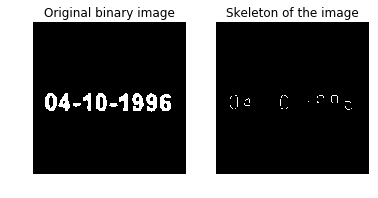

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
"load image data"
# Img_Original =  io.imread( 'download.jpeg')      # Gray image, rgb images need pre-conversion
Img_Original = cv2.imread('cropped.jpg', 0)
"Convert gray images to binary images using Otsu's method"
from skimage.filters import threshold_otsu
Otsu_Threshold = threshold_otsu(Img_Original)   
BW_Original = Img_Original < Otsu_Threshold    # must set object region as 1, background region as 0 !

# def neighbours(x,y,image):
#     "Return 8-neighbours of image point P1(x,y), in a clockwise order"
#     img = image
#     x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
#     return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
#                 img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

# def transitions(neighbours):
#     "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
#     n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
#     return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

# def zhangSuen(image):
#     "the Zhang-Suen Thinning Algorithm"
#     Image_Thinned = image.copy()  # deepcopy to protect the original image
#     changing1 = changing2 = 1        #  the points to be removed (set as 0)
#     while changing1 or changing2:   #  iterates until no further changes occur in the image
#         # Step 1
#         changing1 = []
#         rows, columns = Image_Thinned.shape[0],Image_Thinned.shape[1]               # x for rows, y for columns
#         for x in range(1, rows - 1):                     # No. of  rows
#             for y in range(1, columns - 1):            # No. of columns
#                 P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                
#                 if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
#                     2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
#                     transitions(n) == 1 and    # Condition 2: S(P1)=1  
#                     P2 * P4 * P6 == 0  and    # Condition 3   
#                     P4 * P6 * P8 == 0):         # Condition 4
#                     changing1.append((x,y))
#         for x, y in changing1: 
#             Image_Thinned[x][y] = 0
#         # Step 2
#         changing2 = []
#         for x in range(1, rows - 1):
#             for y in range(1, columns - 1):
#                 P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
#                 if (Image_Thinned[x][y] == 1   and        # Condition 0
#                     2 <= sum(n) <= 6  and       # Condition 1
#                     transitions(n) == 1 and      # Condition 2
#                     P2 * P4 * P8 == 0 and       # Condition 3
#                     P2 * P6 * P8 == 0):            # Condition 4
#                     changing2.append((x,y))    
#         for x, y in changing2: 
#             Image_Thinned[x][y] = 0
#     return Image_Thinned

def neighbours_vec(image):
    return image[2:,1:-1], image[2:,2:], image[1:-1,2:], image[:-2,2:], image[:-2,1:-1],     image[:-2,:-2], image[1:-1,:-2], image[2:,:-2]

def transitions_vec(P2, P3, P4, P5, P6, P7, P8, P9):
    return ((P3-P2) > 0).astype(int) + ((P4-P3) > 0).astype(int) + \
    ((P5-P4) > 0).astype(int) + ((P6-P5) > 0).astype(int) + \
    ((P7-P6) > 0).astype(int) + ((P8-P7) > 0).astype(int) + \
    ((P9-P8) > 0).astype(int) + ((P2-P9) > 0).astype(int)

def zhangSuen_vec(image, iterations):
    for iter in range (1, iterations):
        print(iter)
        # step 1    
        P2,P3,P4,P5,P6,P7,P8,P9 = neighbours_vec(image)
        condition0 = image[1:-1,1:-1]
        condition4 = P4*P6*P8
        condition3 = P2*P4*P6
        condition2 = transitions_vec(P2, P3, P4, P5, P6, P7, P8, P9) == 1
        condition1 = (2 <= P2+P3+P4+P5+P6+P7+P8+P9) * (P2+P3+P4+P5+P6+P7+P8+P9 <= 8)
        cond = (condition0 == 1) * (condition4 == 0) * (condition3 == 0) * (condition2 == 1) * (condition1 == 1)
        changing1 = numpy.where(cond == 1)
        image[changing1[0]+1,changing1[1]+1] = 0
        # step 2
        P2,P3,P4,P5,P6,P7,P8,P9 = neighbours_vec(image)
        condition0 = image[1:-1,1:-1]
        condition4 = P2*P6*P8
        condition3 = P2*P4*P8
        condition2 = transitions_vec(P2, P3, P4, P5, P6, P7, P8, P9) == 1
        condition1 = (2 <= P2+P3+P4+P5+P6+P7+P8+P9) * (P2+P3+P4+P5+P6+P7+P8+P9 <= 6)
        cond = (condition0 == 1) * (condition4 == 0) * (condition3 == 0) * (condition2 == 1) * (condition1 == 1)
        changing2 = numpy.where(cond == 1)
        image[changing2[0]+1,changing2[1]+1] = 0
    return image
 

"Apply the algorithm on images"
BW_Skeleton = zhangSuen(BW_Original)
# BW_Skeleton = BW_Original
"Display the results"
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.ravel()
ax1.imshow(BW_Original, cmap=plt.cm.gray)
ax1.set_title('Original binary image')
ax1.axis('off')
ax2.imshow(BW_Skeleton, cmap=plt.cm.gray)
ax2.set_title('Skeleton of the image')
ax2.axis('off')
plt.show()

In [ ]:
from skimage.

In [56]:
img = cv2.imread('cropped.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
cv2.imshow("skel",skel)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


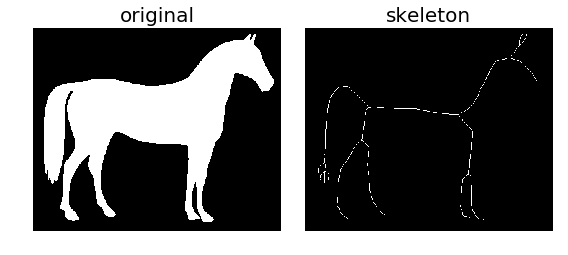

In [87]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
print(data.horse())
image = invert(data.horse())
print(image)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [30]:
image = cv2.imread('licence.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

edges = cv2.Canny(image, 50, 220)
resized = cv2.resize(edges, None, fx = 0.5, fy = 0.5)
cv2.imshow('Edges', resized)
cv2.waitKey(0)

# Find Contours
_, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(edges, contours, -1, (0,255,0), 2)
edges = cv2.resize(edges, None, fx = 0.5, fy = 0.5)
cv2.imshow('Edges after contouring', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
kernel = np.ones((10, 1), np.uint8)
    img_dilation = cv2.dilate(word, kernel, iterations=1)
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    character_list = []
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        #dimensions = [x, y, w, h]
        # Getting ROI
        roi = word[y:y + h, x:x + w]
        squared = makeSquare(roi)
        final = resize_to_pixel(28, squared)
        letter = characterPrediction(final)
        character_list.append(letter)
    return character_list

# Line Detection

# Word Detection

# Character Detection

In [1]:
import cv2
cv2.__version__

'3.3.1'

In [3]:
import cv2
import numpy

In [25]:
# Image with shapes
image = cv2.imread('abc.jpg')
cv2.imshow('Original', image)
cv2.waitKey(0)

resized = cv2.resize(image, None, fx = 2, fy = 2)

# Grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
# Find Canny Edges
edges = cv2.Canny(gray, 30, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)

# Find Contours
_, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Edges after contouring', edges)
cv2.waitKey()

print('Number of Contours found = ' + str(len(contours)))

#contours = np.array(contours).reshape((-1,1,2)).astype(np.int32)
cv2.drawContours(resized, contours, -1, (0,255,0), 2)

cv2.imshow('Contours', resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 742


# My PSC

### Importing libraries

In [1]:
import cv2
import os
import shutil
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image

### Preprocessing image

In [81]:
'''
this function applies a set of preprocessing operations to the input image, function output is a binarized image.
operations are scaling , grayscaling , noise clearing , gaussian's thresholding and remove underlines.
finally the function calls lineSegment function to segment the image into lines.
'''


def pre_processing(path):
    # Read Image
    img = cv2.imread(path)

    # scaling
    height, width = img.shape[:2]
    #     scaled = img
    #     if height < 1600 and width < 1200:
    #         scaled = cv2.resize(img, (2 * width, 2* height), interpolation=cv2.INTER_LINEAR)
    #         # cv2.imwrite('(0)scaled.jpg', scaled)

    # Deskew step
    #     deskewed = deskew(scaled)
    # cv2.imwrite("(1)deskewed.jpg", deskewed)

    # Grayscale step
    grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imwrite("(2)grayscale.jpg", grayscaled)

    # Noise Clearing step
    noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
    # cv2.imwrite("(3)denoise.jpg", noise_cleared)
    '''
    # GAUSSIAN's thresholding
    GBinary = cv2.adaptiveThreshold(noise_cleared,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,5)
    # cv2.imwrite("(4)binarization.jpg", GBinary)
    '''

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(noise_cleared, (5, 5), 0)
    ret3, OBinary = cv2.threshold(blur, 0, 255,
                                  cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # cv2.imwrite("(4)binarization.jpg", OBinary)

    if os.path.exists("output"):
        shutil.rmtree("output")
    os.makedirs("output")
    cv2.imwrite("output/Preprocessed.png", OBinary)

    return OBinary

In [82]:
'''
this function convert image into matrix of image rows
'''
def imgToMatrixR(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all rows
    for i in range(0, height):
        row = []
        for j in range(0, width):
            row.append(img[i,j])
        matrix.append(row)
    return matrix

'''
this function convert image into matrix of image columns
'''
def imgToMatrixC(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all columns
    for i in range(0, width):
        col = []
        for j in range(0, height):
            col.append(img[j, i])
        matrix.append(col)
    return matrix

'''
this function count a specific value (parameter p) in matrix
'''
def countPixel(matrix,p):
    counter = []
    for k in range(0, len(matrix)):
        counter.append(matrix[k].count(p))
    return counter

In [83]:
'''
this function searches for underlines  and replace the pixels that formed it with white pixels 
'''
def lineRemoval(img):
    min_length=140
    matrix = imgToMatrixR(img)
    for i in range(0, len(matrix)):
        row=matrix[i]
        start=-1
        end=0
        conn=0
        for j in range(0, len(row)):
            if (row[j]==0):
                conn=conn+1
                # first point in the line .
                if( start == -1 ):
                    start = j
                # last point in the row .
                if( j == len(row)-1 ):
                    end =j
                    if (conn > min_length):
                        img[i-2:i+4, start:end+1] = 0
                    start = -1
                    end = 0
                    conn = 0
            # end of the line
            else:
                end =j
                if (conn >min_length):
                    img[i-2:i+4, start:end+1] = 0
                start = -1
                end = 0
                conn = 0
    return img

In [84]:

'''
this function clears all horizontal boundaries around the input image
'''
def clearBounds_horiz(img):
    height, width = img.shape
    matrix = imgToMatrixR(img)
    white_counter = countPixel(matrix,255)

    for i in range (0,height):
        if(white_counter[i]>= width-1):
            img = img[1:height,0:width]
        else:
            break

    new_height, width = img.shape
    for i in range (1,height):
        if(white_counter[height-i]>= width-1):
            img = img[0:new_height-i,0:width]
        else:
            break

    return img

'''
this function clears all vertical boundaries around the input image
'''
def clearBounds_vert(img):
    height, width = img.shape
    matrix = imgToMatrixC(img)
    white_counter = countPixel(matrix, 0)

    for i in range (0,width):
        if(white_counter[i]>= height-1):
            img = img[0:height,1:width]
        else:
            break

    height, new_width = img.shape
    for i in range (1,width):
        if(white_counter[width-i]>= height-1):
            img = img[0:height,0:new_width-i]
        else:
            break

    return img

In [85]:
def line_segment(binary):
    # get dimensions
    height, width = binary.shape
    # convert image into matrix of rows
    matrix = imgToMatrixR(binary)
    # count black pixels in each row
    black_counter = countPixel(matrix, 0)

    # determine potential segmentation rows (psr)
    # psr is any row contains 0-2 black pixels, last row in image is also a psr .
    psr = [0]
    for i in range(0, len(black_counter)):
        if black_counter[i] <= 2 or i >= len(black_counter) - 2:
            psr.append(i)
    print(psr)
    # determine segmentation rows sr
    # sr is the index where we segment the image
    sr = []
    count = 0
    for n in range(0, len(psr) - 1):
        # combine each set of sequence white rows into only one sr
        if psr[n] + 3 < psr[n + 1] or n >= len(psr) - 2:
            sr.append(psr[n - int(count / 2)])
            count = 0
        else:
            count += 1
    print(sr)
    # segment image into lines
    global lines
    for c in range(0, len(sr) - 1):
        crop_img = binary[sr[c]:sr[c + 1], 0:width]
        img = crop_img
        img = lineRemoval(crop_img)
#         img = clearBounds_horiz(img)
#         img = clearBounds_vert(img)
        directory = "output/line " + str(c)
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite("output/line " + str(c) + "/line " + str(c) + ".png", img)
        # Call function to Segment the line into words then chars
        lines.append([])
#         word_segment(img, c)
        lines[c].append(",")
    print(lines)

In [86]:
global lines
lines = []

pre_processed = pre_processing('cropped.jpg')
line_segment(pre_processed)

[0, 243, 244]
[0, 243]
[[',']]


# Potential Segmentation Columns

In [36]:
import cv2
import os
import shutil
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image

'''
this function convert image into matrix of image rows
'''
def imgToMatrixR(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all rows
    for i in range(0, height):
        row = []
        for j in range(0, width):
            row.append(img[i,j])
        matrix.append(row)
    return matrix

'''
this function convert image into matrix of image columns
'''
def imgToMatrixC(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all columns
    for i in range(0, width):
        col = []
        for j in range(0, height):
            col.append(img[j, i])
        matrix.append(col)
    return matrix

'''
this function count a specific value (parameter p) in matrix
'''
def countPixel(matrix,p):
    counter = []
    for k in range(0, len(matrix)):
        counter.append(matrix[k].count(p))
    return counter

'''
this function searches for underlines  and replace the pixels that formed it with white pixels 
'''
def lineRemoval(img):
    min_length=140
    matrix = imgToMatrixR(img)
    for i in range(0, len(matrix)):
        row=matrix[i]
        start=-1
        end=0
        conn=0
        for j in range(0, len(row)):
            if (row[j]==0):
                conn=conn+1
                # first point in the line .
                if( start == -1 ):
                    start = j
                # last point in the row .
                if( j == len(row)-1 ):
                    end =j
                    if (conn > min_length):
                        img[i-2:i+4, start:end+1] = 255
                    start = -1
                    end = 0
                    conn = 0
            # end of the line
            else:
                end =j
                if (conn >min_length):
                    img[i-2:i+4, start:end+1] = 255
                start = -1
                end = 0
                conn = 0
    return img

'''
this function clears all horizontal boundaries around the input image
'''
def clearBounds_horiz(img):
    height, width = img.shape
    matrix = imgToMatrixR(img)
    white_counter = countPixel(matrix,255)

    for i in range (0,height):
        if(white_counter[i]>= width-1):
            img = img[1:height,0:width]
        else:
            break

    new_height, width = img.shape
    for i in range (1,height):
        if(white_counter[height-i]>= width-1):
            img = img[0:new_height-i,0:width]
        else:
            break

    return img

'''
this function clears all vertical boundaries around the input image
'''
def clearBounds_vert(img):
    height, width = img.shape
    matrix = imgToMatrixC(img)
    white_counter = countPixel(matrix,255)

    for i in range (0,width):
        if(white_counter[i]>= height-1):
            img = img[0:height,1:width]
        else:
            break

    height, new_width = img.shape
    for i in range (1,width):
        if(white_counter[width-i]>= height-1):
            img = img[0:height,0:new_width-i]
        else:
            break

    return img

'''
this function makes lines of text perfectly horizontal.
'''
def deskew(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


'''
this function applies a set of preprocessing operations to the input image, function output is a binarized image.
operations are scaling , grayscaling , noise clearing , gaussian's thresholding and remove underlines.
finally the function calls lineSegment function to segment the image into lines.
'''
def pre_processing(path):
    # Read Image
    img = cv2.imread(path)

    # scaling
    height, width = img.shape[:2]
    scaled = img
    if height < 1600 and width < 1200:
        scaled = cv2.resize(img, (2 * width, 2* height), interpolation=cv2.INTER_LINEAR)
        # cv2.imwrite('(0)scaled.jpg', scaled)

    # Deskew step
    deskewed = deskew(scaled)
    # cv2.imwrite("(1)deskewed.jpg", deskewed)

    # Grayscale step
    grayscaled = cv2.cvtColor(deskewed, cv2.COLOR_BGR2GRAY)
    # cv2.imwrite("(2)grayscale.jpg", grayscaled)

    # Noise Clearing step
    noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
    # cv2.imwrite("(3)denoise.jpg", noise_cleared)

    '''
    # GAUSSIAN's thresholding
    GBinary = cv2.adaptiveThreshold(noise_cleared,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,5)
    # cv2.imwrite("(4)binarization.jpg", GBinary)
    '''

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(noise_cleared, (5, 5), 0)
    ret3, OBinary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # cv2.imwrite("(4)binarization.jpg", OBinary)
    
    if os.path.exists("output"):
       shutil.rmtree("output")
    os.makedirs("output")
    cv2.imwrite("output/Preprocessed.png", OBinary)

    line_segment(OBinary)
    
    return lines
'''
this function segment the binarized image into lines
segmentation technique consists of 3 steps :
    1- define potential segmentation rows that contains no or 20 black pixels at most.
    2- filter the potential segmentation rows and determine only segmentation rows which the crop operation depends on.
    3- segment the image into lines.
'''
# def line_segment(binary):
#     # get dimensions
#     height, width = binary.shape
#     # convert image into matrix of rows
#     matrix = imgToMatrixR(binary)
#     # count black pixels in each row
#     black_counter =countPixel(matrix,0)

#     # determine potential segmentation rows (psr)
#     # psr is any row contains 0-2 black pixels, last row in image is also a psr .
#     psr=[0]
#     for i in range(0, len(black_counter)):
#         if black_counter[i] <= 2 or i >= len(black_counter) - 2:
#             psr.append(i)

#     # determine segmentation rows sr
#     # sr is the index where we segment the image
#     sr = []
#     count = 0
#     for n in range(0, len(psr) - 1):
#         # combine each set of sequence white rows into only one sr
#         if psr[n] + 3 < psr[n + 1] or n >= len(psr) - 2:
#             sr.append(psr[n - int(count/2)])
#             count=0
#         else:
#             count += 1

#     # segment image into lines
#     global lines
#     for c in range(0, len(sr) - 1):
#         crop_img = binary[sr[c]:sr[c + 1], 0:width]
#         img = lineRemoval(crop_img)
#         img = clearBounds_horiz(img)
#         img = clearBounds_vert(img)
#         directory="output/line "+str(c)
#         if not os.path.exists(directory):
#             os.makedirs(directory)
#         cv2.imwrite("output/line "+str(c)+"/line " + str(c) + ".png", img)
#         # Call function to Segment the line into words then chars
#         lines.append([])
#         word_segment(img, c)
#         lines[c].append(",")

'''
this function segment lines into columns then words
lineNum parameter used for naming, flag parameter refers to the type of segmentation.
segmentation technique consists of 4 steps :
    1- define potential segmentation columns that contains no or only two black pixels.
    2- filter the potential segmentation columns,determine only segmentation columns which the crop operation depends on
    3- segment the image into segments (column)
    4- recursive call to segment columns into words
'''
# def word_segment(binary, lineNum):
#     word_threshold=7

#     # get image dimension
#     height, width = binary.shape
#     # convert image to matrix of columns
#     matrix = imgToMatrixC(binary)
#     # count black pixels in each column
#     black_counter = countPixel(matrix,0)

#     # determine potential segmentation columns (psc).
#     # psc is any column contains no or two black pixel at most , last column in image is also a psc .
#     psc = [0]
#     for p in range(0, len(black_counter)):
#         if black_counter[p] <= 2 or p >= len(black_counter) - 2:
#             psc.append(p)

#     # determine segmentation columns (sc)
#     # sc is the index where we segment the image .
#     sc = []
#     count = 0
#     for n in range(0, len(psc) - 1):
#         # first column is sc
#         if n == 0:
#             sc.append(psc[n])
#             count = 0
#         # last column is also sc
#         elif n >= len(psc) - 2:
#             sc.append(psc[n])
#             count = 0

#         # combine each set of sequence white columns into only one sc
#         elif psc[n] + 3 < psc[n + 1] :
#             # space between words >= threshold value, low values is a space between chars not words.
#             if count >= word_threshold :
#                 sc.append(psc[n -int(count/2)])
#             count = 0

#         else:
#             count += 1

#     for c in range(0, len(sc) - 1):
#         crop_img = binary[0:height, sc[c]:sc[c + 1] + 2]
#         directory = "output/line " + str(lineNum)+"/word " + str(c)
#         if not os.path.exists(directory):
#             os.makedirs(directory)
#         cv2.imwrite(directory + "/word " + str(c) + ".png", crop_img)
#         char_segment(crop_img, lineNum, c)

'''
this function segment words into chars
lineNum and wordNum parameters used for naming 
segmentation technique consists of 3 steps :
    1- define potential segmentation columns that contains no or only one black pixels.
    2- filter potential segmentation columns by determine segmentation columns which the crop operation depends on .
    3- segment the image into segments (chars).
'''
def char_segment(binary,lineNum,wordNum):
    # get image dimension
    height, width = binary.shape
    # convert image to matrix of columns
    matrix = imgToMatrixC(binary)
    # count black pixels in each column
    black_counter = countPixel(matrix,0)

    # determine potential segmentation columns (psc).
    # psc is any column contains no or one black bixel at most , last column in image is also a psc .
    psc = [0]
    for p in range(0, len(black_counter)):
        if black_counter[p] <= 1 or p >= len(black_counter) - 2:
            psc.append(p)

    # determine segmentation columns (sc)
    # sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
    sc = []
    summ = 0
    count = 0
    for n in range(0, len(psc) - 1):
        summ = summ + psc[n]
        count = count + 1
        # combine each set of sequence white columns into only one sc ,last column is also a sc
        if psc[n] + 3 < psc[n + 1] or n >= len(psc) - 2:
            sc.append(int(summ / count))
            summ = 0
            count = 0

    global lines
    # segment image into chars
    for c in range(0, len(sc) - 1):
        crop_img = binary[0:height, sc[c]:sc[c + 1]+2]
        crop_img = clearBounds_horiz(crop_img)
        crop_img = clearBounds_vert(crop_img)
        crop_img = cv2.resize(crop_img, (64, 128), interpolation=cv2.INTER_LINEAR)
        directory= "output/line " + str(lineNum)+"/word "+str(wordNum)
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory+"/"+str(c)+".png", crop_img)
        lines[lineNum].append(crop_img)
        if c == (len(sc) - 2):
            lines[lineNum].append(",")
    print("HERE")
    print(lines)


# Preprocessing function Calling
lines =[]
# lines = g("Test\\testcase1.png")

In [37]:
pre_processing('cropped.jpg')

HERE
[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), ',']]
HERE
[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 2

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  ',',
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 25